In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

In [2]:
sp500 = web.DataReader('^GSPC', data_source='yahoo', start='1/1/2000', end='4/14/2014')

In [3]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
High         3592 non-null float64
Low          3592 non-null float64
Open         3592 non-null float64
Close        3592 non-null float64
Volume       3592 non-null int64
Adj Close    3592 non-null float64
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


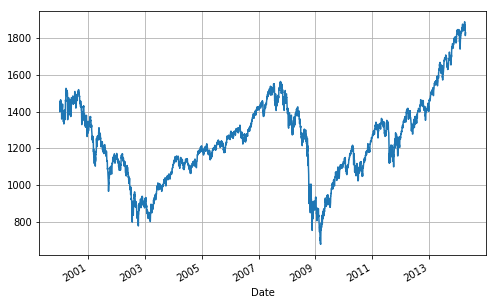

In [4]:
sp500['Close'].plot(grid=True, figsize=(8, 5))
plt.show()

In [5]:
# Moving averages 42 days and 252 days
sp500['42d'] = np.round(sp500['Close'].rolling(42).mean())
sp500['252d'] = np.round(sp500['Close'].rolling(252).mean())

In [6]:
sp500[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2014-04-08,1851.959961,1854.0,1729.0
2014-04-09,1872.180054,1856.0,1730.0
2014-04-10,1833.079956,1856.0,1731.0
2014-04-11,1815.689941,1856.0,1732.0
2014-04-14,1830.609985,1857.0,1733.0


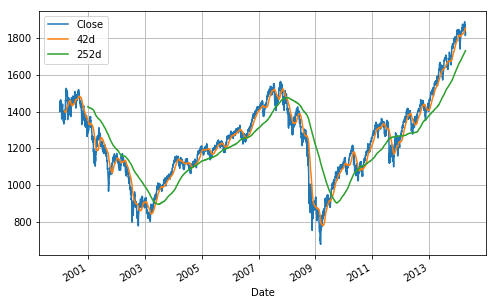

In [7]:
sp500[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))

• buy signal (go long): the 42d trend is for the first time SD points above the 252d
trend


• wait (park in cash): the 42d trend is within a range of +/- SD points around the
252d trend


• sell signal (go short): the 42d trend is for the first time SD points below the 252d
trend

In [8]:
sp500['42 - 252'] = sp500['42d'] - sp500['252d']

In [9]:
sp500['42 - 252'].tail()

Date
2014-04-08    125.0
2014-04-09    126.0
2014-04-10    125.0
2014-04-11    124.0
2014-04-14    124.0
Name: 42 - 252, dtype: float64

In [10]:
sp500['42 - 252'].head()

Date
2000-01-03   NaN
2000-01-04   NaN
2000-01-05   NaN
2000-01-06   NaN
2000-01-07   NaN
Name: 42 - 252, dtype: float64

In [11]:
# Signal threshold is assumed to 50
SD = 50
sp500['Regime'] = np.where(sp500['42 - 252'] > SD, 1, 0)
sp500['Regime'] = np.where(sp500['42 - 252'] < -SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    1484
 0    1239
-1     869
Name: Regime, dtype: int64

On 1484 trading dates, the 42d trend lies more than SD points above the 252d trend


On 1239 trading dates, the 42d trend is more than SD points below the 252d trend


Obviously, if the short-term trend crosses the line of the long-term trend, it tends to rest there for while. This is what is called regime

(-1.1, 1.1)

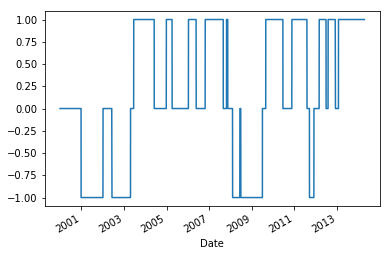

In [12]:
sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])

Signal regime over time

Does not take into account transaction cost or interest

In [13]:
sp500['Market'] = np.log(sp500['Close'] / sp500['Close'].shift(1))

In [14]:
sp500['Strategy'] = sp500['Regime'].shift(1) * sp500['Market']

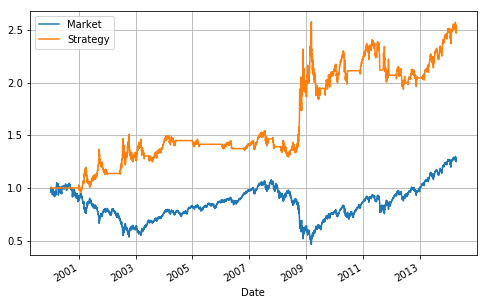

In [15]:
sp500[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8, 5))